<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Model Selection and Validation
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import warnings

In [2]:
train = pd.read_excel('Train.xlsx')
test = pd.read_excel('Test.xlsx')

print(train.shape)
print(test.shape)

(200, 2)
(300, 1)


In [3]:
train.head()

,sentences,label
0,I highly recommend using phrases like this (es...,0.0
1,"It was only for 3 mins at first, then 5, then ...",0.0
2,Facing my negativity and gaining control of my...,1.0
3,I didn’t realize how insecure of a person I am...,1.0
4,God help me!-My anxiety has gotten better over...,1.0


In [4]:
col=np.array(train['label'], np.int16)
train['label']=col

In [5]:
test.head()

,sentences
0,Am I over sensitive?
1,There is a lot going on right now.A couple wee...
2,Or is it just my anxiety messing w me?
3,"I have tried Pregabalin, and that only makes m..."
4,"*So, how do we turn this around?"


In [6]:
train.isnull().any()
test.isnull().any()

sentences    False
dtype: bool

In [7]:
# checking out the non anxious comments from the train set

train[train['label'] == 0].head(10)

,sentences,label
0,I highly recommend using phrases like this (es...,0
1,"It was only for 3 mins at first, then 5, then ...",0
6,I feel the best first thing in the morning.,0
9,"If we could hang out every day, I would honest...",0
10,Basically pure evil.,0
13,My friends used to joke I had a girl for each ...,0
22,I lied that I went to a public school instead ...,0
23,I'm not even scared of people?,0
32,I can't ask for help.,0
38,Okay I’m gonna make this as short as I can.,0


In [8]:
# checking out the postive anxious from the train set 

train[train['label'] == 1].head(10)

,sentences,label
2,Facing my negativity and gaining control of my...,1
3,I didn’t realize how insecure of a person I am...,1
4,God help me!-My anxiety has gotten better over...,1
5,I want to ask for advice on how to start.CBT c...,1
7,For me my primary symptom is nausea ( rarely I...,1
8,I know these things are supposed to make you f...,1
11,So far my doctor has been reluctant to start m...,1
12,How do I settle in and stop feeling so dreadful?,1
14,"Then the day came, and I heard nothing.",1
15,Stupidly I signed a contract for a whole year....,1


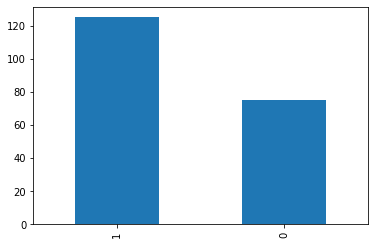

In [9]:
train['label'].value_counts().plot.bar(figsize = (6, 4))

Text(0.5, 1.0, 'Frequently Occuring Words - Top 50')

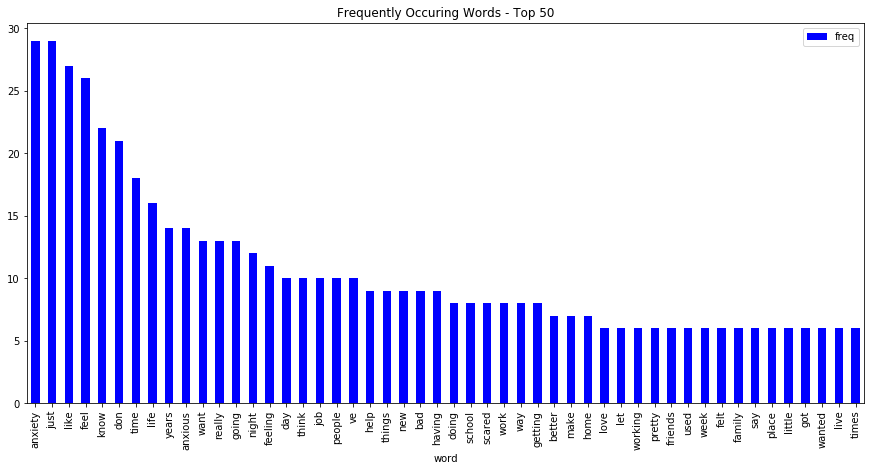

In [10]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.sentences)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Frequently Occuring Words - Top 50")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Sentences')

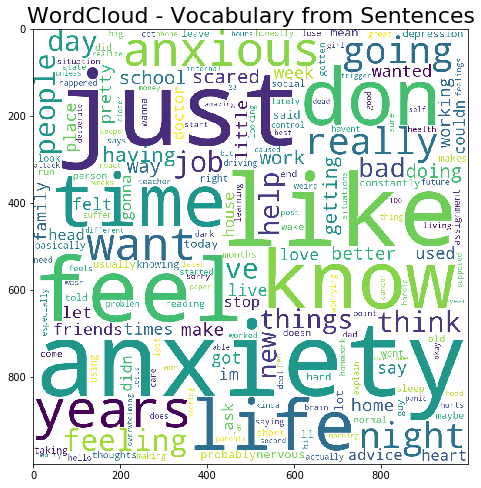

In [11]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Sentences", fontsize = 22)

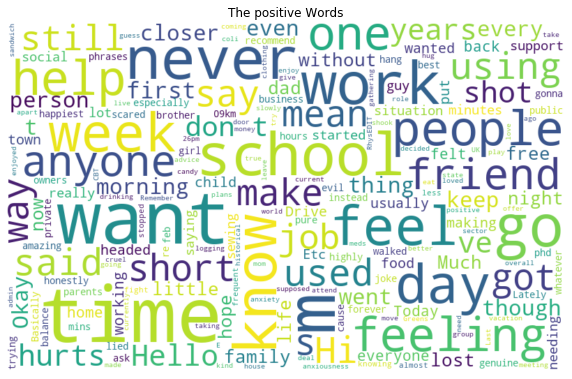

In [12]:
positive_words =' '.join([text for text in train['sentences'][train['label'] == 0]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The positive Words')
plt.show()

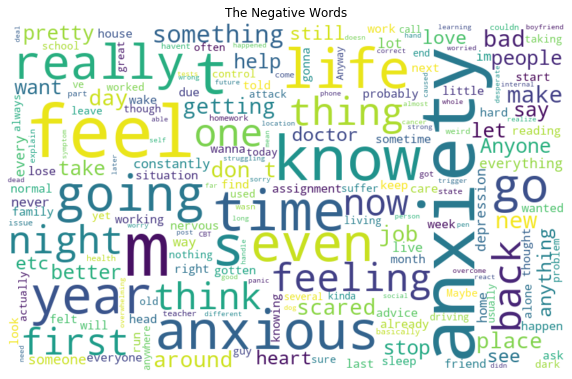

In [13]:
negative_words =' '.join([text for text in train['sentences'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [14]:
features = train['sentences'].values
labels = train['label'].values

In [15]:

processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [16]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [17]:
# Split into training and testing data

x_train, x_valid, y_train, y_valid = train_test_split(processed_features, labels,test_size=0.25, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=200, random_state=0)
rfc_model.fit(x_train, y_train)

y_pred = rfc_model.predict(x_valid)

print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(accuracy_score(y_valid, y_pred))



[[10  5]
 [ 9 26]]
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        15
           1       0.84      0.74      0.79        35

    accuracy                           0.72        50
   macro avg       0.68      0.70      0.69        50
weighted avg       0.74      0.72      0.73        50

0.72


In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_valid)

print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(accuracy_score(y_valid, y_pred))


[[ 4 11]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        15
           1       0.75      0.94      0.84        35

    accuracy                           0.74        50
   macro avg       0.71      0.60      0.61        50
weighted avg       0.72      0.74      0.70        50

0.74


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_valid)

print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(accuracy_score(y_valid, y_pred))


[[10  5]
 [13 22]]
              precision    recall  f1-score   support

           0       0.43      0.67      0.53        15
           1       0.81      0.63      0.71        35

    accuracy                           0.64        50
   macro avg       0.62      0.65      0.62        50
weighted avg       0.70      0.64      0.65        50

0.64


In [21]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(accuracy_score(y_valid, y_pred))

[[ 5 10]
 [ 4 31]]
              precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.76      0.89      0.82        35

    accuracy                           0.72        50
   macro avg       0.66      0.61      0.62        50
weighted avg       0.70      0.72      0.70        50

0.72


<b> Most accurate model: Logistic Regression <b>

In [22]:
X_new = vectorizer.transform(test['sentences'])
label=lr_model.predict(X_new)

In [23]:
test['label']=label

In [24]:
test

,sentences,label
0,Am I over sensitive?,1
1,There is a lot going on right now.A couple wee...,1
2,Or is it just my anxiety messing w me?,1
3,"I have tried Pregabalin, and that only makes m...",1
4,"*So, how do we turn this around?",1
...,...,...
295,Should I tell her explicitly that I want medic...,0
296,the hundreds and hundreds of google searches a...,1
297,Thankfully this fear doesn’t stop me from livi...,1
298,Thank you so much in advance!-Just here to com...,1


In [25]:
for col in test.columns:
    if test[col].dtype==object:
        test[col]=test[col].apply(lambda x: np.nan if x==np.nan else str(x).encode('utf-8', 'replace').decode('utf-8'))

In [26]:
test.to_csv('predicted_test.csv',index=False)